In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-pack

In [2]:
embedder = SentenceTransformer('distiluse-base-multilingual-cased')

/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/transformers/tokenization_utils.py:831: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  category=FutureWarning,


In [59]:
dxy_rumors=pd.read_csv('../data/DXY_rumors.csv')
dxy_rumors = dxy_rumors.drop(['_id','id','summary','sourceUrl','crawlTime'],axis=1)
dxy_rumors = dxy_rumors.drop_duplicates(subset='title', keep='last')
dxy_rumors.title = dxy_rumors.title.str.replace(r'[？?,，。.]','')
dxy_rumors

,title,mainSummary,body,rumorType
2,疫情期间大强度锻炼可提高抵抗力,国家体育总局体育科学研究所研究员徐建方：长时间大强度的运动，会导致身体机能失调，免疫功能下降,在居家防疫期间，为确保运动安全有效，运动强度必须适宜。强度过低，没有锻炼效果，但是长时间大强...,0
3,改用吸痰机后武汉死亡人数减半,刘良教授辟谣：没有干预过任何个例的临床治疗,有传闻称：「病患遗体解剖发现死者肺部出现大量痰栓，而痰栓是由呼吸机使用所产生，致人缺氧而死。...,0
4,吃降压药会增加感染病毒的风险,丁香医生团队辟谣：目前没有任何动物和临床研究数据证实这种说法的可靠性,因现有研究显示ACE2是新型冠状病毒入侵人体的关键，网传服用ACEI（血管紧张素转化酶抑制剂...,0
5,急救改用吸痰机帮助武汉死亡人数减半,刘良教授辟谣：没有干预过任何个例的临床治疗,有传闻称：「病患遗体解剖发现死者肺部出现大量痰栓，而痰栓是由呼吸机使用所产生，致人缺氧而死。...,0
6,可在家使用新冠病毒试剂盒自测,北京市药监局提示：普通市民家庭不可自行使用,近日，有人在朋友圈兜售某公司生产的新冠病毒抗体检测试剂盒，单价150元，并宣称可以家庭自行使...,0
...,...,...,...,...
279,深圳要封城,深圳市互联网信息办公室：是谣言,1月26日下午从深圳市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室获悉，有关深圳市将要“...,0
280,日本派出千名医疗人员,其实是误解,27日下午，网上流传一张日本媒体报道武汉肺炎疫情的截图，配文称“日本派了1000名医疗工作者...,0
281,带呼吸阀的口罩没有用,丁香医生团队辟谣：口罩上有呼吸阀不用担心,呼吸阀的气流是单向向外的，不影响使用者的防护效果。但已经有症状的人，建议不要使用带有呼吸阀的...,0
282,熏醋可以预防新冠,丁香医生团队辟谣：熏醋杀不死新型冠状病毒,一瓶醋里的醋酸含量最多也只有5%。将醋里的醋酸蒸发到空气中的做法，提升空气酸度的空间十分有限...,0


In [58]:
piyao_rumors=pd.read_csv('../data/piyao.csv')
piyao_rumors.title = piyao_rumors.title.str.replace(r'[？?,，：、。.]','')
piyao_rumors

,id,title,pubtime,linkurl,rumorType,editor,author,sourcename
0,0,广西有人3次检测呈阳性,2020-06-28 10:49:26,http://www.piyao.org.cn/2020-06/28/c_121067970...,0,张智萍,NaN,昭平公安
1,1,蚊蝇可以传播新冠病毒,2020-06-28 10:49:51,http://www.piyao.org.cn/2020-06/28/c_121067958...,0,张智萍,NaN,中国新闻网
2,2,南昌民德路锦江之星酒店发现有俄罗斯人患新冠肺炎,2020-06-26 11:05:25,http://www.piyao.org.cn/2020-06/26/c_121067743...,0,张智萍,NaN,央广网
3,4,市民路过中高风险地区健康码会变色,2020-06-24 15:44:27,http://www.piyao.org.cn/2020-06/24/c_121067535...,0,冯栋,张璐,新京报
4,5,上海30天内禁止跨省旅游团,2020-06-24 16:28:01,http://www.piyao.org.cn/2020-06/24/c_121067536...,0,冯栋,白璐,上海网络辟谣
...,...,...,...,...,...,...,...,...
943,995,中国向菲律宾捐赠20万只口罩,2020-02-11 23:21:37,http://www.piyao.org.cn/2020-02/11/c_121046411...,0,张智萍,NaN,中国驻菲律宾大使馆官网
944,996,疫情致广西防城港市玉林市博白县陆川县米粮断供,2020-02-12 08:42:01,http://www.piyao.org.cn/2020-02/12/c_121047075...,0,张智萍,NaN,防城港市市场监管局
945,997,黑龙江省疫情数据翻倍,2020-02-11 22:55:06,http://www.piyao.org.cn/2020-02/11/c_121046876...,0,张智萍,NaN,东北网
946,998,长沙封城株洲封外地户口进不了城一律凭身份证进城,2020-02-12 08:36:35,http://www.piyao.org.cn/2020-02/12/c_121047076...,0,张智萍,NaN,湖南省长沙市交警支队官方微博


In [5]:
corpus = pd.concat([piyao_rumors,dxy_rumors]).title.values

corpus_embeddings = embedder.encode(corpus)

corpus.shape

(1160,)

In [6]:
# from sklearn.cluster import KMeans

# num_clusters = 5
# clustering_model = KMeans(n_clusters=num_clusters)
# clustering_model.fit(corpus_embeddings)
# cluster_assignment = clustering_model.labels_

# for i in range(num_clusters):
#     cluster_corpus = []
#     for j in np.where(cluster_assignment==i)[0]:
#         cluster_corpus += [corpus[j]]
#     print(cluster_corpus,'\n')

In [73]:
allrumors = pd.concat([piyao_rumors,dxy_rumors])
allrumors.insert(1,'label',0)
allrumors['id']=range(len(allrumors))
allrumors = allrumors.reset_index(drop=True)
allrumors.to_csv('../data/all_rumors.csv')
allrumors

,id,label,title,pubtime,linkurl,rumorType,editor,author,sourcename,mainSummary,body
0,0,0,广西有人3次检测呈阳性,2020-06-28 10:49:26,http://www.piyao.org.cn/2020-06/28/c_121067970...,0,张智萍,NaN,昭平公安,NaN,NaN
1,1,0,蚊蝇可以传播新冠病毒,2020-06-28 10:49:51,http://www.piyao.org.cn/2020-06/28/c_121067958...,0,张智萍,NaN,中国新闻网,NaN,NaN
2,2,0,南昌民德路锦江之星酒店发现有俄罗斯人患新冠肺炎,2020-06-26 11:05:25,http://www.piyao.org.cn/2020-06/26/c_121067743...,0,张智萍,NaN,央广网,NaN,NaN
3,3,0,市民路过中高风险地区健康码会变色,2020-06-24 15:44:27,http://www.piyao.org.cn/2020-06/24/c_121067535...,0,冯栋,张璐,新京报,NaN,NaN
4,4,0,上海30天内禁止跨省旅游团,2020-06-24 16:28:01,http://www.piyao.org.cn/2020-06/24/c_121067536...,0,冯栋,白璐,上海网络辟谣,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1155,1155,0,深圳要封城,NaN,NaN,0,NaN,NaN,NaN,深圳市互联网信息办公室：是谣言,1月26日下午从深圳市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室获悉，有关深圳市将要“...
1156,1156,0,日本派出千名医疗人员,NaN,NaN,0,NaN,NaN,NaN,其实是误解,27日下午，网上流传一张日本媒体报道武汉肺炎疫情的截图，配文称“日本派了1000名医疗工作者...
1157,1157,0,带呼吸阀的口罩没有用,NaN,NaN,0,NaN,NaN,NaN,丁香医生团队辟谣：口罩上有呼吸阀不用担心,呼吸阀的气流是单向向外的，不影响使用者的防护效果。但已经有症状的人，建议不要使用带有呼吸阀的...
1158,1158,0,熏醋可以预防新冠,NaN,NaN,0,NaN,NaN,NaN,丁香医生团队辟谣：熏醋杀不死新型冠状病毒,一瓶醋里的醋酸含量最多也只有5%。将醋里的醋酸蒸发到空气中的做法，提升空气酸度的空间十分有限...


Estimated number of clusters: 9


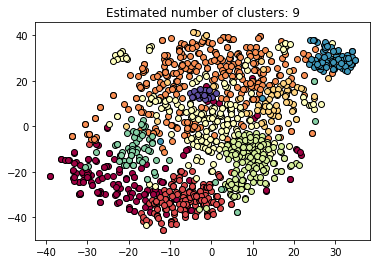

In [147]:
import numpy as np

from sklearn.cluster import Birch
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

target_cluster_number = 9

# #############################################################################
# Generate sample data

X = StandardScaler().fit_transform(corpus_embeddings)

# #############################################################################\

brc = Birch(n_clusters=target_cluster_number,threshold=0.8)
brc.fit(X)
labels = brc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: %d' % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt


tsne = TSNE(n_components = 2, init = 'random', random_state = target_cluster_number, perplexity = 50)
X = tsne.fit_transform(X)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# #############################################################################
clustered_corpus = []
for i in range(len(unique_labels)):
    clustered_corpus += [[]]
    for j in np.where(labels==i)[0]:
        clustered_corpus[i] += [corpus[j]]
#     print(clustered_corpus[i],'\n')

In [156]:
import jieba

def load_stopwords_list(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords

# '疫情','感染','确诊','病例'
stopwords_list = load_stopwords_list('../../stopwords/baidu_stopwords.txt')+['新型','新冠','肺炎','病毒','会','天','日','人','不','月','好','日起','冠状病毒']
words = jieba.cut(clustered_corpus[0][0])
# print('/'.join(words))

word_count = []
for i in range(len(clustered_corpus)):
    word_count += [{}]
    label_corpus = clustered_corpus[i]
    for j in range(len(label_corpus)):
        sentence = label_corpus[j]
        words = jieba.cut(sentence)
        for word in words:
            if word not in stopwords_list and len(word.strip())>0 and not word.isdigit():
                word_count[i][word] = 1 if word not in word_count[i] else word_count[i][word]+1
output = [sorted(list(x.items()),key=lambda y: y[1], reverse=True) for x in word_count]
output = [[y for y in x if y[1]>10] for x in output]
for i,count in enumerate(output):
    all = clustered_corpus[i]
    print('label: ',i+1,'\nlength: ',len(all),'\nkeywords: ',count[0:7],'\n','\n'.join([all[j] for j in range(min(15,len(all)))]),'\n')

label:  1 
length:  143 
keywords:  [('消毒', 29), ('酒精', 20), ('感染', 14)] 
 广西有人3次检测呈阳性
南昌自来水加大氯气注入 需静置两小时以上再用
北京自来水加大氯气注入需静置两小时以上再用
中国石化熔喷布价格上调24%
口服或者注射消毒液是无稽之谈
“川崎病”症状已确定为新冠病毒感染引发的新症状
用抗体阳性率能推算当前武汉无症状感染者
山东海阳一女子血清检测IgM抗体阳性
舒兰疫情已到铁东了
狂风暴雪会加速病毒传播
工业酒精稀释后可用于皮肤消毒
孕妇不能使用含氯消毒剂进行消毒
无症状感染者是新冠病毒后期的特征
伊维菌素可以杀死新冠病毒
猫对新冠病毒具有高易感性 

label:  2 
length:  144 
keywords:  [('预防', 42), ('吃', 22), ('感染', 14), ('传播', 12)] 
 蚊蝇可以传播新冠病毒
中国人更易感染新冠病毒
病毒零下20度可存活20年并非指新冠病毒
感染新型冠状病毒男性生育力会受影响
用漂白剂洗水果蔬菜可预防新冠病毒
中国妨碍西方研发新冠疫苗
新冠病毒不会倏然而去冬秋季节要存戒惧之心
刮风下雨对新冠病毒传播有加速作用
世卫组织新冠病毒“毒性”并未减弱
中国正在“窃取”美国新冠病毒研究成果
鸡屎藤能预防新冠病毒
新冠病毒疫苗临床试验目前未收到有重大不良反应报告
中国黑客试图窃取美新冠疫苗成果
吉林省和龙市出现一例新冠病毒感染者
世卫组织确定新冠病毒源自自然界 

label:  3 
length:  294 
keywords:  [('隔离', 42), ('人员', 35), ('确诊', 19), ('恢复', 19), ('上海', 17), ('疫情', 17), ('武汉', 17)] 
 上海30天内禁止跨省旅游团
对离京人员一律隔离14天
河北顺平林江商厦卖带鱼的老板被隔离
肉蛋鱼海鲜不能吃了
交通运输部端午节及今后一段时期继续暂停省际旅游客运
雄安安新县实施全封闭管理
豆制品有毒不能吃了
上海地铁11号线因有新冠患者突然暂停
深圳福田区发现自北京抵深确诊病例
深圳地铁9号线封了
广西一酒店接待北京客人致20多人发烧被隔离
上海嘉里中心3名北京来沪人员发烧
天津蓟州区下仓镇封村批发水果村民新冠检测阳性
15

In [158]:
for i in range(target_cluster_number):
    for j in range(len(clustered_corpus[i])):
        index = allrumors[allrumors.title==clustered_corpus[i][j]].index
        allrumors.iloc[index,1]=i+1
allrumors.sort_values('label',inplace=True)
allrumors.to_csv('../data/all_rumors.csv')
allrumors

,id,label,title,pubtime,linkurl,rumorType,editor,author,sourcename,mainSummary,body
768,768,1,雄黄可以杀死新型冠状病毒,2020-02-14 12:21:05,http://www.piyao.org.cn/2020-02/14/c_121047414...,0,周文婧,NaN,内蒙古辟谣平台、腾讯较真,NaN,NaN
986,986,1,千万别出门玩雪会感染新冠病毒,NaN,NaN,0,NaN,NaN,NaN,北京地坛医院感染病急诊主任王凌航：不用担心新冠病毒会通过雪来传染,北京地坛医院感染病急诊主任王凌航表示：关于气候条件和呼吸道传染病流行之间，实际上没有必然联系...
274,274,1,北京市幼升小以及小升初预计推迟至七月,2020-04-19 16:18:44,http://www.piyao.org.cn/2020-04/19/c_121057742...,0,张智萍,NaN,@北京市教委,NaN,NaN
686,686,1,疫苗最快4月下旬申报临床试验,2020-02-21 13:34:46,http://www.piyao.org.cn/2020-02/21/c_121048409...,1,芮静,NaN,人民日报客户端,NaN,NaN
174,174,1,教育部明确体育课莫戴N95口罩 中高考体育测试项目可适当调整,2020-05-13 10:19:23,http://www.piyao.org.cn/2020-05/13/c_121061653...,1,闫丹丹,NaN,央视网,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
761,761,9,受疫情影响重庆主城区从13日起暂停猪肉供应,2020-02-14 12:59:16,http://www.piyao.org.cn/2020-02/14/c_121047429...,0,张智萍,NaN,网信重庆微信公众号,NaN,NaN
444,444,9,国足因北京拒绝落地而滞留迪拜,2020-03-23 10:11:31,http://www.piyao.org.cn/2020-03/23/c_121052611...,0,芮静,NaN,新华社,NaN,NaN
677,677,9,北京金融街某通讯公司大楼发生聚集性感染,2020-02-22 08:51:40,http://www.piyao.org.cn/2020-02/22/c_121048480...,0,冯栋,NaN,@北京发布,NaN,NaN
218,218,9,柳州一中学发现疫情不报口罩发少了,2020-04-30 11:00:08,http://www.piyao.org.cn/2020-04/30/c_121059852...,0,杜畅,NaN,广西新闻网、南国今报,NaN,NaN


In [145]:
output = [sorted(list(x.items()),key=lambda y: y[1], reverse=True) for x in word_count]
output1 = []
for i,count in enumerate(output):
    for j in count:
        output1.append(list(j)+[i])

In [146]:
output1 = pd.DataFrame(output1,columns=['word','frequency','category'])
output1

,word,frequency,category
0,疫情,39,0
1,武汉,31,0
2,确诊,28,0
3,病例,28,0
4,核酸,23,0
...,...,...,...
3795,航空港,1,7
3796,区,1,7
3797,延边,1,7
3798,谣言,1,7


In [20]:
output1.to_csv('../data/cluster_word_frequency.csv')